In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import json
from pennylane import numpy as np

FILES_NAMES = {"simplified_2_design":{"fd":["simplified2design_1layers_fd","simplified2design_2layers_fd","simplified2design_3layers_fd","simplified2design_4layers_fd"], "ps":["simplified2design_1layers_ps","simplified2design_2layers_ps","simplified2design_3layers_ps","simplified2design_4layers_ps"]},
               "single_double":{"fd":["meta_simples_doubles_fd"], "ps":["meta_simples_doubles_ps"]},
               "double":{"fd":["meta_doubles_fd"], "ps":["meta_doubles_ps"]},
               "kupccgsd":{"fd":["kupccgsd_1layers_fd", "kupccgsd_2layers_fd"], "ps":["kupccgsd_1layers_ps", "kupccgsd_2layers_ps"]}}

DATA = {i:{"fd":[],"ps":[]} for i in FILES_NAMES}

with open('./h2_fci.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    fci_h2 = json.loads(data)   

GRAD_METHOD_COMP = "fd" ## "fd" or "ps"

DICT_GRAD_METHOD = {"fd":"Finite Diff", "ps":"Parameter Shift"}


test_points=fci_h2["points"]
fci_energies = fci_h2["energies"]
    

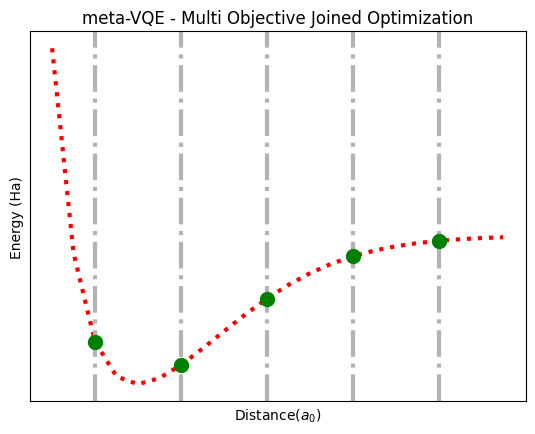

In [51]:
# Meta VQE description plot
train_points_indexes = [2,6,10,14,18]

fig, ax = plt.subplots()

ax.plot(test_points,fci_energies, color="r", linewidth=3, ls="dotted")


ax.set_title('meta-VQE - Multi Objective Joined Optimization')
ax.set_ylabel('Energy (Ha)')
ax.set_xlabel('Distance($a_{0}$)')

ax.set_yticks([])
ax.set_xticks([])

for i in train_points_indexes:
    ax.axvline(x=test_points[i], color='0.7', linewidth=3, ls='-.')


ax.scatter([test_points[i] for i in train_points_indexes], [fci_energies[i] for i in train_points_indexes], zorder=99, label="Train Points", marker='o', color="green", s=100)


[]

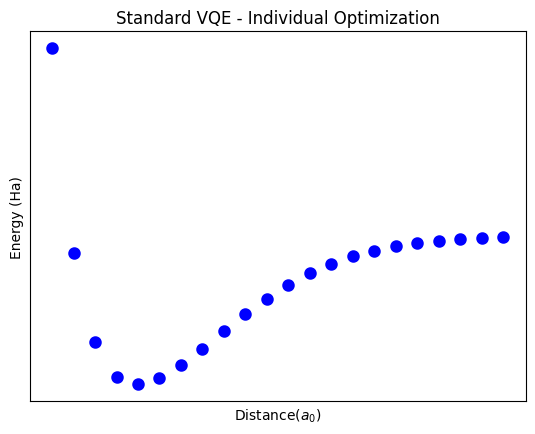

In [52]:
# Meta VQE description plot
train_points_indexes = [2,6,10,14,18]

fig, ax = plt.subplots()

ax.scatter(test_points,fci_energies, color="b", linewidth=3, marker='o')


ax.set_title('Standard VQE - Individual Optimization')
ax.set_ylabel('Energy (Ha)')
ax.set_xlabel('Distance($a_{0}$)')

ax.set_yticks([])
ax.set_xticks([])


In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [4]:
for ansatz in FILES_NAMES:
    for diff_method in FILES_NAMES[ansatz]:
        for file in FILES_NAMES[ansatz][diff_method]:

            with open(f'exp_runs_analytic/{file}.json', 'r') as reader:
                # Read & print the entire file
                data = reader.read()
                DATA[ansatz][diff_method].append(json.loads(data))


In [5]:
simplified_data_fd = DATA["simplified_2_design"]["fd"][3]["results"]
single_double_data_fd = DATA["single_double"]["fd"][0]["results"]
double_data_fd = DATA["double"]["fd"][0]["results"]
kupccgsd_data_fd = DATA["kupccgsd"]["fd"][0]["results"]


In [6]:
len(simplified_data_fd["adam"]["meta"]["energies"][-1])

201

<function matplotlib.pyplot.show(close=None, block=None)>

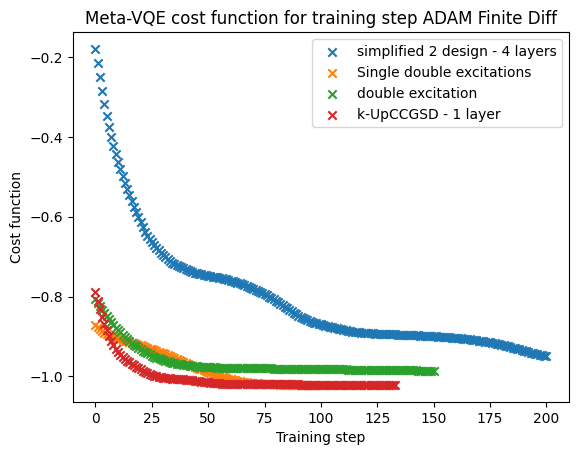

In [7]:
# Plot for meta energies


plt.scatter([i for i in range(len(simplified_data_fd["adam"]["meta"]["energies"][-1]))],simplified_data_fd["adam"]["meta"]["energies"][-1], label="simplified 2 design - 4 layers", marker='x')
plt.scatter([i for i in range(len(single_double_data_fd["adam"]["meta"]["energies"][-1]))],single_double_data_fd["adam"]["meta"]["energies"][-1], label="Single double excitations", marker='x')
plt.scatter([i for i in range(len(double_data_fd["adam"]["meta"]["energies"][-1]))],double_data_fd["adam"]["meta"]["energies"][-1], label="double excitation", marker='x')
plt.scatter([i for i in range(len(kupccgsd_data_fd["adam"]["meta"]["energies"][-1]))],kupccgsd_data_fd["adam"]["meta"]["energies"][-1], label="k-UpCCGSD - 1 layer", marker='x')

plt.legend()
plt.title('Meta-VQE cost function for training step ADAM Finite Diff')
plt.ylabel('Cost function')
plt.xlabel('Training step')
plt.show

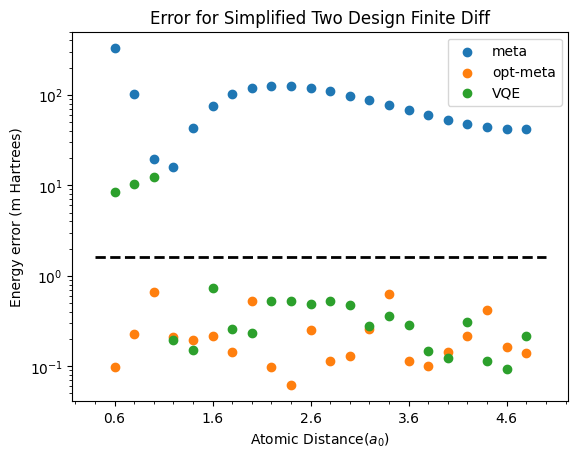

In [8]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(simplified_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in simplified_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in simplified_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Simplified Two Design Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


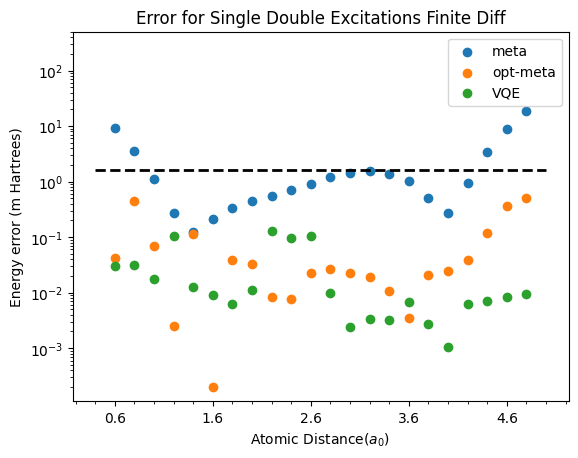

In [9]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(single_double_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in single_double_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in single_double_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Single Double Excitations Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


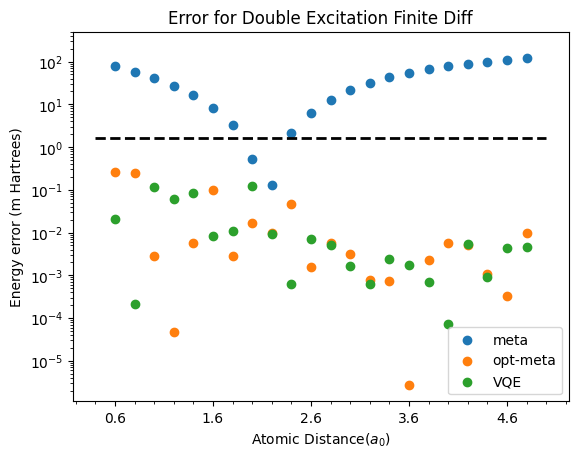

In [10]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(double_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in double_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in double_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Double Excitation Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


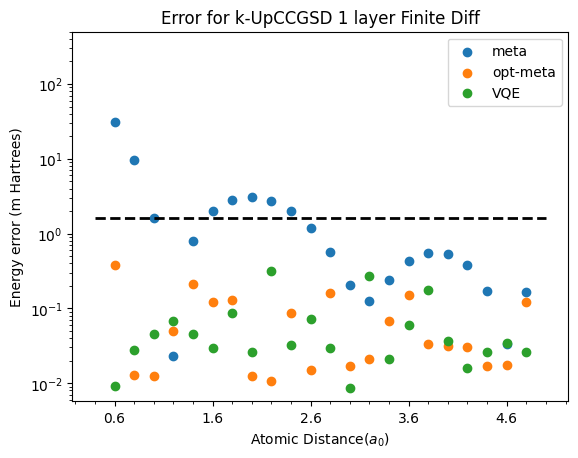

In [11]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(kupccgsd_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in kupccgsd_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in kupccgsd_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for k-UpCCGSD 1 layer Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))
